# 휴먼지능정보공학과 201810808 정민지

In [1]:
import os
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

## 문제: 년별 분기별 대여건수
서울시 열린데이터 https://data.seoul.go.kr/ 에서 제공하는 ```서울특별시_공공자전거 일별 대여건수_(2018~2019.03).csv```를 분석해보자.

파일은 웹 검색을 해서 다운로드해서 사용하면 된다.

데이터는 일자별로, 대여건수이이고, 몇 줄만 출력해보면 다음과 같다.  

|      date| count|
|----------|------|
|2018-01-01|  4950|
|2018-01-02|  7136|
|2018-01-03|  7156|
|2018-01-04|  7102|
|2018-01-05|  7705|

In [55]:
myDf = spark\
        .read.format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true')\
        .load(os.path.join('data','서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv'))

In [56]:
myDf.printSchema()

root
 |-- 대여일자: string (nullable = true)
 |-- 대여건수: integer (nullable = true)



In [57]:
myDf.show(3)

+----------+--------+
|  대여일자|대여건수|
+----------+--------+
|2018-01-01|    4950|
|2018-01-02|    7136|
|2018-01-03|    7156|
+----------+--------+
only showing top 3 rows



### 문제 1-1: 년도별 대여건수 합계

데이터는 2018, 2019년 15개월 간의 대여건수이다. 년도별로 대여건수의 합계를 계산해서 출력하자.

#### 년도 컬럼 만들기

In [58]:
myDf=myDf.withColumn("year",myDf.대여일자.substr(1,4))

In [59]:
myDf.show(3)

+----------+--------+----+
|  대여일자|대여건수|year|
+----------+--------+----+
|2018-01-01|    4950|2018|
|2018-01-02|    7136|2018|
|2018-01-03|    7156|2018|
+----------+--------+----+
only showing top 3 rows



#### 합계 구하기

In [60]:
myDf.groupBy('year').agg({"대여건수":"sum"}).orderBy("year").show()

#orderBy("year", ascending=False) --> 내림차순 정렬

+----+-------------+
|year|sum(대여건수)|
+----+-------------+
|2018|     10124874|
|2019|      1871935|
+----+-------------+



### 문제 1-2: 년도별, 월별 대여건수 합계

년별, 월별로 대여건수를 계산하여 합계를 계산하여 출력한다.



#### 년도+월 컬럼 만들기

In [61]:
myDf=myDf.withColumn("yearNmonth",myDf.대여일자.substr(1,7))

In [62]:
myDf.show(3)

+----------+--------+----+----------+
|  대여일자|대여건수|year|yearNmonth|
+----------+--------+----+----------+
|2018-01-01|    4950|2018|   2018-01|
|2018-01-02|    7136|2018|   2018-01|
|2018-01-03|    7156|2018|   2018-01|
+----------+--------+----+----------+
only showing top 3 rows



#### 합계 구하기

In [73]:
sum_ym=myDf.groupBy('yearNmonth').agg({"대여건수":"sum"}).orderBy("yearNmonth")

In [74]:
sum_ym.show()

+----------+-------------+
|yearNmonth|sum(대여건수)|
+----------+-------------+
|   2018-01|       164367|
|   2018-02|       168741|
|   2018-03|       462661|
|   2018-04|       687885|
|   2018-05|       965609|
|   2018-06|      1207123|
|   2018-07|      1100015|
|   2018-08|      1037505|
|   2018-09|      1447993|
|   2018-10|      1420621|
|   2018-11|       961532|
|   2018-12|       500822|
|   2019-01|       495573|
|   2019-02|       471543|
|   2019-03|       904819|
+----------+-------------+



### 문제 1-3: 년도별, 월별 대여건수 그래프

문제 1-2의 출력을 선 그래프로 그려보자.

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [127]:
yNm=sum_ym.rdd.map(lambda fields:fields[0]).collect()
sum_rental=sum_ym.rdd.map(lambda fields:fields[1]).collect()

In [128]:
#길이 옆으로 늘리기
plt.rcParams["figure.figsize"] = (14,5)

#격자
plt.rcParams['axes.grid'] = True

#두께
plt.rcParams['lines.linewidth'] = 2

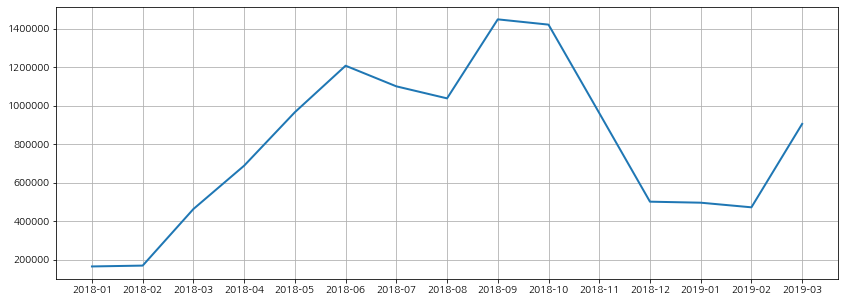

In [129]:
plt.plot(np.array(yNm), np.array(sum_rental))
plt.show()

---

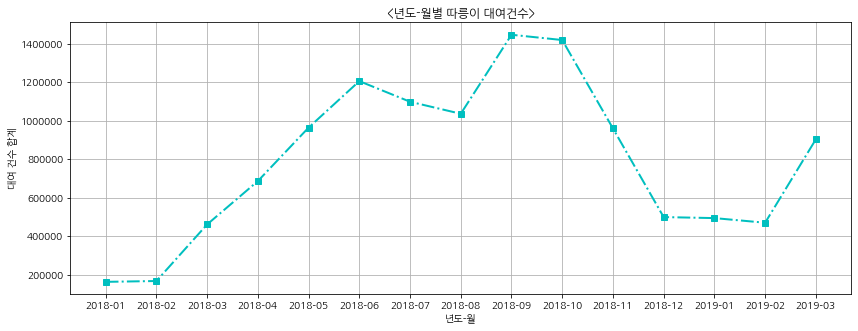

In [130]:
from matplotlib import rc, font_manager
rc('font',family="NanumGothic")
plt.plot(np.array(yNm), np.array(sum_rental),'cs-.') #c:청록, s: 사각형, -: 대시점선

#title
plt.title("<년도-월별 따릉이 대여건수>")

#x,y label
plt.xlabel("년도-월")
plt.ylabel("대여 건수 합계")

plt.show()